<a href="https://colab.research.google.com/github/leo-lopes/Fraud-Detection-/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud detection in Banks

The project is to analyze a dataset that simulates a dataset of a real bank. We will use this dataset because real banks don't share real dataset for protection issues. The dataset can found in kaggle.Link: https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example and it's generated using the <a href="https://github.com/EdgarLopezPhD/PaySim"> PaySim</a>, that is a simulator of bank data. 

Variáveis do dataset

* step - It means a unity of time in the real world. In here, 1 step means 1 hour.

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 

* amount - Amount of the transaction in some currency.

* nameOrig - Client that iniciated the bank operation

* oldbalanceOrg -  initial balance (before transaction)

* newbalanceOrig - New balance (after transaction)

* nameDest - transaction recipient

* oldbalanceDest - initial balance before transaction.

* newbalanceDest - new balance after transaction.

* isFraud - Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out.

* isFlaggedFraud - An illegal attempt to transfer massive amount of money in a single transaction.

## Cleaning the Data

In [ ]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/ML/'

In [ ]:
df = pd.read_csv(path+'fraud.csv')
df

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  101613.000000  1.016130e+05   1.016130e+05    1.016130e+05   
mean        8.523457  1.740901e+05   9.071753e+05    9.234992e+05   
std         1.820681  3.450199e+05   2.829575e+06    2.867319e+06   
min         1.000000  3.200000e-01   0.000000e+00    0.000000e+00   
25%         8.000000  1.001659e+04   0.000000e+00    0.000000e+00   
50%         9.000000  5.338541e+04   2.019047e+04    0.000000e+00   
75%        10.000000  2.124984e+05   1.947150e+05    2.192178e+05   
max        10.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    1.016130e+05    1.016130e+05  101613.000000        101613.0  
mean     8.810428e+05    1.183998e+06       0.001142             0.0  
std      2.399949e+06    2.797761e+06       0.033768             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00    0.000000e+00       0.000000             0.0  
50%      2.105800e+04    5.178343e+04       0.000000             0.0  
75%      5.919217e+05    1.063122e+06       0.000000             0.0  
max      3.400874e+07    3.894623e+07       1.000000             0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


## Creating a report using pandas-profiling 

Now we're using pandas-profiling to create an automatic report of our dataset 

In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 4.2 MB/s 
     |████████████████████████████████| 102 kB 48.8 MB/s 
     |████████████████████████████████| 679 kB 72.9 MB/s 
     |████████████████████████████████| 9.9 MB 45.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 4.7 MB 19.5 MB/s 
     |████████████████████████████████| 296 kB 57.6 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=125b72bea6d1231936d46a3aa414d9294c2bc4bc5d55cbfbb9347cf18d23eb0c
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Enconding variables (One-hot-encoding)

We need to encode the strings variables in order to transform them in numbers to use ML. We can use One-hot-encorder that transforms every class that appears in our column in another column, or we can use labelEncorder that just map every class in a number. In here we're going to user the OHE by the ger_dummies of pandas

In [ ]:
df = pd.get_dummies(data=df,columns=['type'])
df.head()

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0             0.0             0.0        0               0             0   
1             0.0             0.0        0               0             0   
2             0.0             0.0        1               0             0   
3         21182.0             0.0        1               0             0   
4             0.0             0.0        0               0             0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

As the report showed the 'isFlaggedFraud' column is constant so we can drop it. Beside that, the only two columns of type object is the 'nameOrig' and 'nameDest' and we can drop it too.

In [ ]:
df.drop(['isFlaggedFraud','nameOrig','nameDest'],axis=1,inplace=True)

## Applying ML techniques
Let's apply ML in order to found if a transaction is a fraud or not. For this we need create a set of  variables 'x' that is our predictor and the target variable 'y'. Then, we need to separate our train set from the test set.

In [ ]:
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred)) 
print("F1:",metrics.f1_score(y_test, pred))

Accuracy: 0.9988518567117176
Precision: 0.4
Recall: 0.12121212121212122
F1: 0.186046511627907


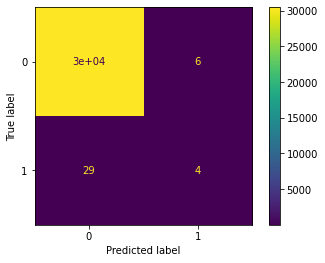

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Just applying the ML to the data doesn't work in a properly way, the reason is that we have just a few rows where we have a fraud, so we need treat this disbalanced data.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(x,y)
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced


isFraud  step         amount  oldbalanceOrg  newbalanceOrig  \
0             0     1    9839.640000  170136.000000       160296.36   
1             0     1    1864.280000   21249.000000        19384.72   
2             1     1     181.000000     181.000000            0.00   
3             1     1     181.000000     181.000000            0.00   
4             0     1   11668.140000   41554.000000        29885.86   
...         ...   ...            ...            ...             ...   
202989        1     7  344387.391383  344387.391383            0.00   
202990        1     9  377970.616709  377970.616709            0.00   
202991        1     8  250121.944927  250121.944927            0.00   
202992        1     5   33560.039880   33560.039880            0.00   
202993        1     4   22356.997291   22356.997291            0.00   

        oldbalanceDest  newbalanceDest  type_CASH_IN  type_CASH_OUT  \
0             0.000000    0.000000e+00             0              0   
1             0.000000    0.000000e+00             0              0   
2             0.000000    0.000000e+00             0              0   
3         21182.000000    0.000000e+00             0              1   
4             0.000000    0.000000e+00             0              0   
...                ...             ...           ...            ...   
202989    14078.941115    4.784125e+05             0              1   
202990     5503.605376    1.211128e+06             0              0   
202991        0.000000    1.326140e+06             0              0   
202992    26932.695212    0.000000e+00             0              0   
202993        0.000000    0.000000e+00             0              0   

        type_DEBIT  type_PAYMENT  type_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              0  
202990           0             0              0  
202991           0             0              1  
202992           0             0              0  
202993           0             0              1  

[202994 rows x 12 columns]

Now we have the same number of line with frauds and non-frauds

In [ ]:
df_balanced.groupby('isFraud').step.count()


isFraud
0    101497
1    101497
Name: step, dtype: int64

In [ ]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred)) 
print("F1:",metrics.f1_score(y_test, pred))

Accuracy: 0.94109919703115
Precision: 0.9255005235269854
Recall: 0.9592541436464088
F1: 0.9420750908356882


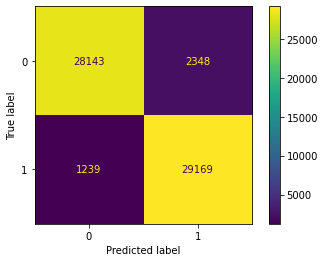

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Now, we can see that our model worked and we can detect the frauds

In [ ]:
pandas_profiling.ProfileReport(df_balanced)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Decision Tree

In a real Bank situation it will be good a model that detects more frauds as possible, than we try to improve our results using the decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier( random_state=1)
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [ ]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))


Acurácia: 0.9983907781736975
Precisão: 0.9977665374761874
Recall: 0.9990134175217048
F1: 0.9983895881946955


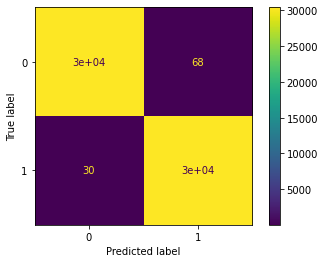

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


The results are better, but we still can try to use random forest to see if we can do it even better

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state =1)
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [ ]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))


Acurácia: 0.9994252779191777
Precisão: 0.9989486480270723
Recall: 0.9999013417521705
F1: 0.9994247678527405


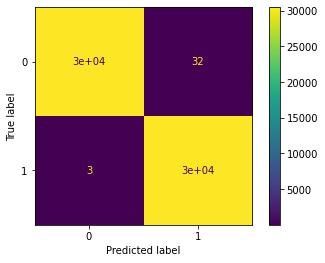

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


The results are better, we can identify fraud in a really good proportion

## Conclusions 

In here we have simulated a situation where a bank need to detect fraud using machine learning, we create 3 ML algorithms (Logistic regression, decision tree and random forest) to improve our results and detect in the mostrly efficient manner we could. In our final model we have the numbers:

Accuracy: 0.9994252779191777

Precision: 0.9989486480270723

Recall: 0.9999013417521705

F1: 0.9994247678527405,

that points to a good model in the fraud detection.

